In [1]:
from imgseries import Front1D
from imgseries import ImgSeries

from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

**NOTE**: the main (numbered) sections are independent of each other

# 1) Analyze images

## Load images

In [2]:
images = ImgSeries('../data/front-flick/')

# Apply crop and rotation to images in order to have front propagation purely along x
# and also have only the zone of interest (crop) in the analysis
# (can be made interactively, see examples in ImgSeries)
images.load_transforms('../data/for-tests-do-not-modify/FlickFront_Transform')

# These images have flicker, which needs to be corrected before the analysis for better front detection
# If your images don't have flicker, this step is unnecessary.
images.flicker.load('../data/for-tests-do-not-modify/FlickFront_FlickerData')

images

ImgSeries, data length [25]
-- corrections: ['flicker']
-- transforms: ['rotation', 'crop']
from FileSeries in . / ['../data/front-flick'], 25 files]

## Analyze

In [3]:
f1d = Front1D(images, savepath='../data/untracked_data/')

In [4]:
f1d.run()

  0%|          | 0/25 [00:00<?, ?it/s]

100%|██████████| 25/25 [00:00<00:00, 516.16it/s]


In [5]:
f1d.results.data.tail()

,folder,filename,time (unix),0,1,2,3,4,5,6,...,209,210,211,212,213,214,215,216,217,218
num,,,,,,,,,,,,,,,,,,,,,
20,../data/front-flick,img-00020.png,1.708332e+09,170.965517,174.834483,175.324138,171.655172,171.503448,174.875862,175.855172,...,146.917241,148.351724,150.234483,148.579310,149.248276,149.586207,150.806897,153.041379,155.186207,154.524138
21,../data/front-flick,img-00021.png,1.708332e+09,171.096552,175.055172,175.468966,172.420690,171.393103,174.696552,176.179310,...,147.048276,148.434483,150.041379,148.420690,149.496552,150.013793,150.600000,153.372414,155.593103,154.972414
22,../data/front-flick,img-00022.png,1.708332e+09,170.572414,174.537931,175.613793,172.310345,171.351724,174.227586,175.668966,...,147.213793,148.048276,149.972414,148.648276,149.689655,149.710345,150.413793,153.027586,155.406897,154.531034
23,../data/front-flick,img-00023.png,1.708332e+09,170.655172,174.972414,175.600000,172.379310,171.303448,174.524138,176.268966,...,146.910345,148.296552,150.000000,148.379310,149.344828,149.544828,150.455172,153.186207,155.482759,154.682759
24,../data/front-flick,img-00024.png,1.708332e+09,170.600000,174.317241,174.965517,171.710345,171.220690,174.386207,175.924138,...,147.013793,148.324138,150.365517,148.662069,149.331034,149.834483,150.827586,153.234483,155.482759,154.668966


In [6]:
f1d.results.metadata

{'path': ('/Users/olivier.vincent/Python-OV/imgseries/examples/data/untracked_data',),
 'folders': ['../front-flick'],
 'flicker': True,
 'shaking': False,
 'grayscale': {},
 'rotation': {'angle': 0.278583442478391},
 'crop': {'zone': [26, 2, 219, 145]},
 'filter': {},
 'subtraction': {},
 'threshold': {}}

In [7]:
f1d.results.save()

# 2) Load and analyze data a posteriori

In [8]:
images = ImgSeries('../data/front-flick/')
images.load_transforms('../data/for-tests-do-not-modify/FlickFront_Transform')
images.flicker.load('../data/for-tests-do-not-modify/FlickFront_FlickerData')
f1d = Front1D(images, savepath='../data/for-tests-do-not-modify/')
f1d.regenerate(filename='FlickFront_FrontData')

In [9]:
f1d.results.data.tail()

,folder,filename,time (unix),0,1,2,3,4,5,6,...,209,210,211,212,213,214,215,216,217,218
num,,,,,,,,,,,,,,,,,,,,,
20,data/front-flick,img-00020.png,1.708332e+09,170.965517,174.834483,175.324138,171.655172,171.503448,174.875862,175.855172,...,146.917241,148.351724,150.234483,148.579310,149.248276,149.586207,150.806897,153.041379,155.186207,154.524138
21,data/front-flick,img-00021.png,1.708332e+09,171.096552,175.055172,175.468966,172.420690,171.393103,174.696552,176.179310,...,147.048276,148.434483,150.041379,148.420690,149.496552,150.013793,150.600000,153.372414,155.593103,154.972414
22,data/front-flick,img-00022.png,1.708332e+09,170.572414,174.537931,175.613793,172.310345,171.351724,174.227586,175.668966,...,147.213793,148.048276,149.972414,148.648276,149.689655,149.710345,150.413793,153.027586,155.406897,154.531034
23,data/front-flick,img-00023.png,1.708332e+09,170.655172,174.972414,175.600000,172.379310,171.303448,174.524138,176.268966,...,146.910345,148.296552,150.000000,148.379310,149.344828,149.544828,150.455172,153.186207,155.482759,154.682759
24,data/front-flick,img-00024.png,1.708332e+09,170.600000,174.317241,174.965517,171.710345,171.220690,174.386207,175.924138,...,147.013793,148.324138,150.365517,148.662069,149.331034,149.834483,150.827586,153.234483,155.482759,154.668966


Text(0, 0.5, 'Front Data')

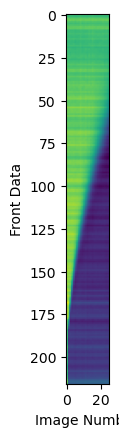

In [10]:
fig, ax = plt.subplots()

try:
    data = f1d.results.data.loc[:, 3:]
except TypeError:
    data = f1d.results.data.loc[:, '3':]

ax.imshow(data.T)
ax.set_xlabel('Image Number')
ax.set_ylabel('Front Data')